## ALF versus ED

In [4]:
from py_alf import ALF_source, Simulation

This loop generates 3 different simulations, one for each $\tau\in\{0.05,0.1,0.15\}$.
Also, it adapts all the boolean flags for checkerboard and symm.

In [5]:
import os
alf_src = ALF_source()
betas = [1, 2, 4]
EDv = [-0.62186692,-1.47261997,-1.90837196]  # corresponding ED values
taus = [0.05, 0.1, 0.15]
b1s = [True, False]
b2s = [True, False]
b3s = [True, False]
sims = [
    Simulation(
        alf_src,
        'Hubbard',
        {
            # this is fixed
            'L1': 4,
            'L2': 1,
            'Ham_T': 1.0,
            'Ham_U': 4.0,
            'Ham_Tperp': 0.0,
            'Ltau': 0,
            'NSweep': 100,
            'NBin': 20,
            # we change this
            'Checkerboard': b1,
            'Symm': b2,
            'Mz': b3,
            'beta': beta,
            'Dtau': dtau,
        },
        # mpi=True,
        # n_mpi=4
    )
    for dtau in taus for b3 in b3s for b2 in b2s for b1 in b1s for beta in betas]

sims[0].compile()  # this is only needed if no crutial changes in sim dict have been made

Compiling ALF... 
Cleaning up Prog/
Cleaning up Libraries/
Cleaning up Analysis/
Compiling Libraries


entanglement_mod.F90:36:2:

   36 | #warning "You are compiling entanglement without MPI. No results possible"
      |  1~~~~~~
ar: creating modules_90.a
ar: creating libqrref.a


Compiling Analysis
Compiling Program
Parsing Hamiltonian parameters
filename: Hamiltonians/Hamiltonian_Kondo_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_smod.F90
filename: Hamiltonians/Hamiltonian_tV_smod.F90
filename: Hamiltonians/Hamiltonian_LRC_smod.F90
filename: Hamiltonians/Hamiltonian_Z2_Matter_smod.F90
Compiling program modules
Link program
Done.


In [6]:
for (i, sim) in enumerate(sims):
    print(f"Starting simulation: {i+1}/{len(sims)}\n\n")
    sim.run()

Starting simulation: 0/72


Prepare directory "/home/andreas/myALF/ALF_data/Hubbard_L1=4_L2=1_T=1.0_U=4.0_Tperp=0.0_Checkerboard=True_Symm=True_Mz=True_beta=1_Dtau=0.05" for Monte Carlo run.
Resuming previous run.
Run /home/andreas/myALF/ALF/Prog/ALF.out
 ALF Copyright (C) 2016 - 2021 The ALF project contributors
 This Program comes with ABSOLUTELY NO WARRANTY; for details see license.GPL
 This is free software, and you are welcome to redistribute it under certain conditions.
Starting simulation: 1/72


Prepare directory "/home/andreas/myALF/ALF_data/Hubbard_L1=4_L2=1_T=1.0_U=4.0_Tperp=0.0_Checkerboard=True_Symm=True_Mz=True_beta=2_Dtau=0.05" for Monte Carlo run.
Resuming previous run.
Run /home/andreas/myALF/ALF/Prog/ALF.out
 ALF Copyright (C) 2016 - 2021 The ALF project contributors
 This Program comes with ABSOLUTELY NO WARRANTY; for details see license.GPL
 This is free software, and you are welcome to redistribute it under certain conditions.
Starting simulation: 2/72


Prepare di

In [ ]:
sim = sims[0]
sim.analysis()
obs = sim.get_obs()
obs.keys()
obs["Ener_scal0_err"].iloc[0]

In [47]:
import pandas as pd
# create pandas dict
df = pd.DataFrame(columns=['E', 'dE', 'beta', 'dtau', 'cb', 's', 'mz'])
for sim in sims:
    sim.analysis()
    dict = sim.sim_dict
    obs = sim.get_obs()
    dtau = dict['Dtau']
    cb = dict['Checkerboard']
    s = dict['Symm']
    mz = dict['Mz']
    beta = dict['beta']
    val = obs['Ener_scal0'].iloc[0]
    err = obs["Ener_scal0_err"].iloc[0]

    time = 0
    fn = sim.get_directories()[0]+"/info"
    f = open(fn, 'r')
    for l in f:
        if 'CPU Time' in l:
            time = l.split()[-1]
    df = df.append({'E': val, 'dE': err, 
                    'beta': beta, 'dtau': dtau, 
                    'mz': mz, 'cb': cb, 's': s,
                    'CPU time': time
                    }, ignore_index=True)

### Analyzing /home/andreas/myALF/ALF_data/Hubbard_L1=4_L2=1_T=1.0_U=4.0_Tperp=0.0_Checkerboard=True_Symm=True_Mz=True_beta=1_Dtau=0.05 ###
/home/andreas/myALF
already analyzed
/home/andreas/myALF/ALF_data/Hubbard_L1=4_L2=1_T=1.0_U=4.0_Tperp=0.0_Checkerboard=True_Symm=True_Mz=True_beta=1_Dtau=0.05
### Analyzing /home/andreas/myALF/ALF_data/Hubbard_L1=4_L2=1_T=1.0_U=4.0_Tperp=0.0_Checkerboard=True_Symm=True_Mz=True_beta=2_Dtau=0.05 ###
/home/andreas/myALF
already analyzed
/home/andreas/myALF/ALF_data/Hubbard_L1=4_L2=1_T=1.0_U=4.0_Tperp=0.0_Checkerboard=True_Symm=True_Mz=True_beta=2_Dtau=0.05
### Analyzing /home/andreas/myALF/ALF_data/Hubbard_L1=4_L2=1_T=1.0_U=4.0_Tperp=0.0_Checkerboard=True_Symm=True_Mz=True_beta=4_Dtau=0.05 ###
/home/andreas/myALF
already analyzed
/home/andreas/myALF/ALF_data/Hubbard_L1=4_L2=1_T=1.0_U=4.0_Tperp=0.0_Checkerboard=True_Symm=True_Mz=True_beta=4_Dtau=0.05
### Analyzing /home/andreas/myALF/ALF_data/Hubbard_L1=4_L2=1_T=1.0_U=4.0_Tperp=0.0_Checkerboard=False_S

In [48]:
df

,E,dE,beta,dtau,cb,s,mz,CPU time
0,-0.624463,0.012029,1,0.05,True,True,True,1.0229458800000000
1,-1.467161,0.014665,2,0.05,True,True,True,2.0696442720000001
2,-1.952292,0.023315,4,0.05,True,True,True,4.0943155879999997
3,-0.624463,0.012029,1,0.05,False,True,True,0.84319023100000001
4,-1.467161,0.014665,2,0.05,False,True,True,1.6271954319999999
...,...,...,...,...,...,...,...,...
67,-1.542596,0.066598,2,0.15,True,False,False,0.43097767700000000
68,-2.007662,0.078157,4,0.15,True,False,False,0.77046797199999995
69,-0.779285,0.035219,1,0.15,False,False,False,0.26584704900000000
70,-1.542596,0.066598,2,0.15,False,False,False,0.40880160399999999


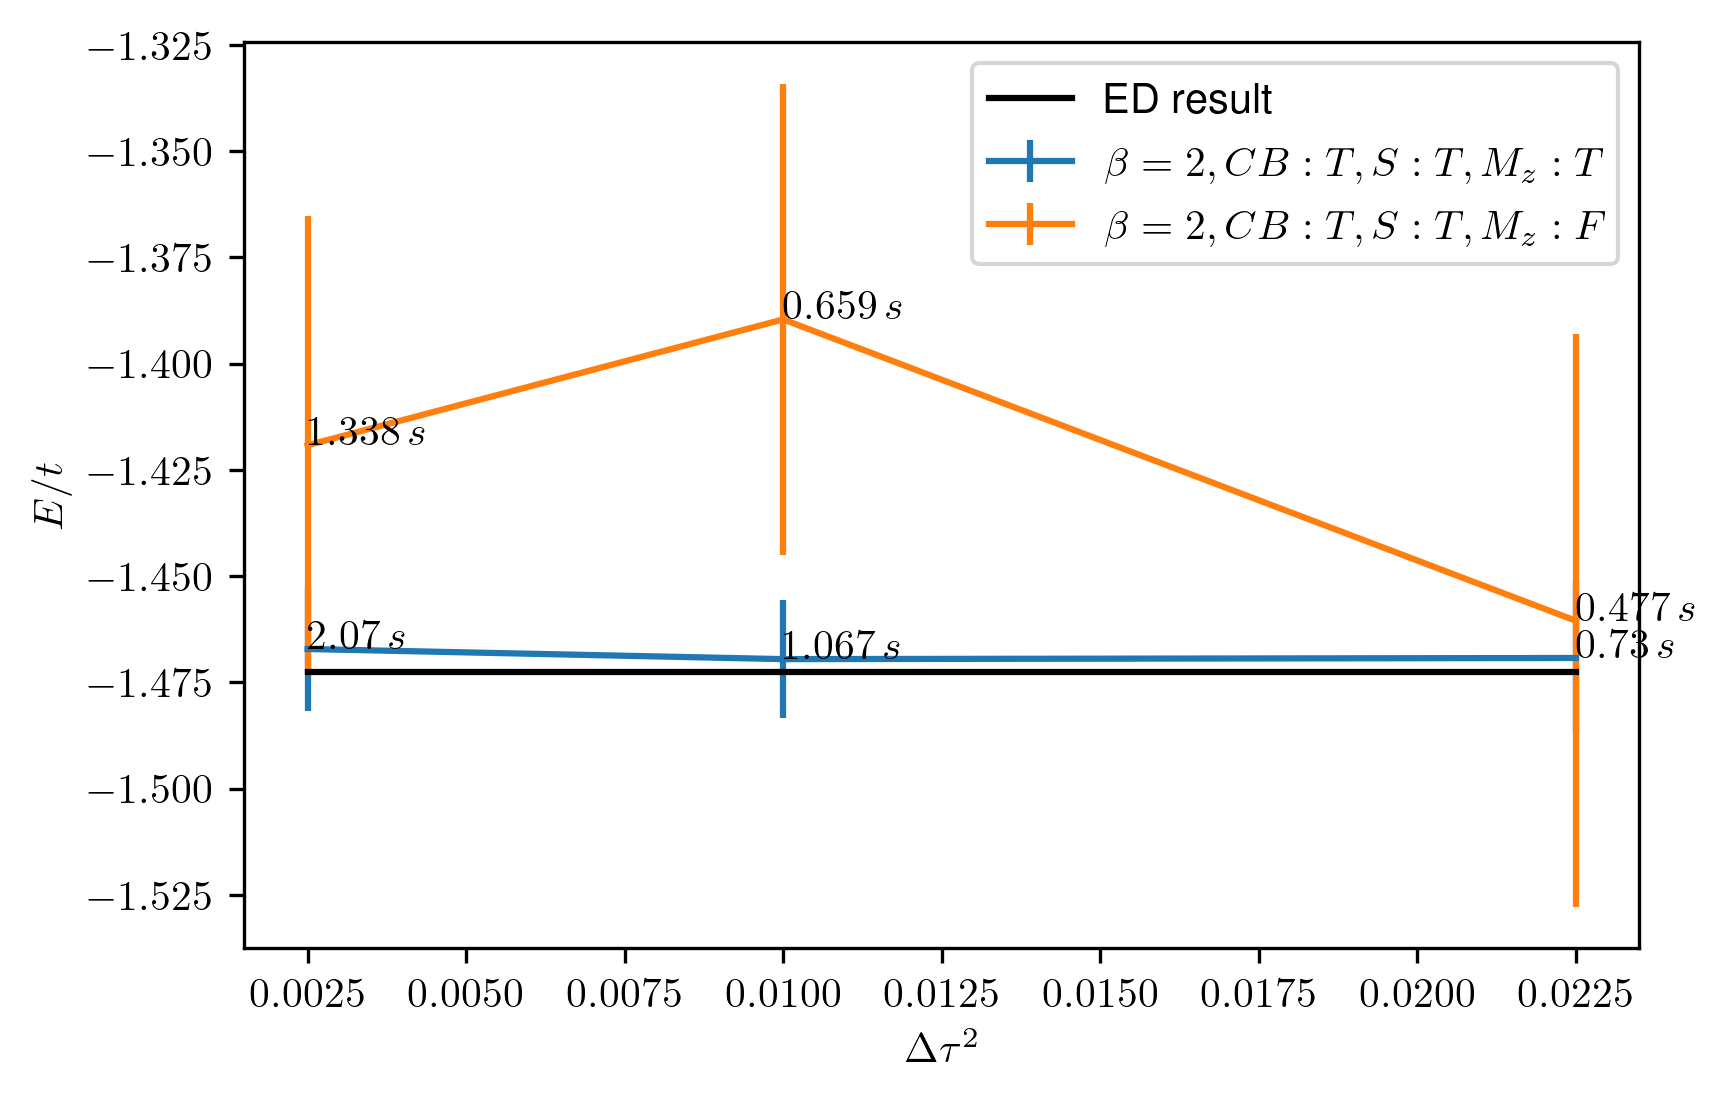

In [62]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
mpl.rcParams['figure.dpi'] = 300
# figsize=np.asarray(((3+3/8), (3+3/8)))
# plt.figure(figsize=figsize)
ax = plt.subplot()
for (i, beta) in enumerate(betas):
    if beta == betas[1]:
        for b1 in [True]:
            for b2 in [True]:
                for b3 in [True, False]:                 
                    f1, f2, f3 = 'F', 'F', 'F'
                    if b1:
                        f1 = 'T'
                    if b2:
                        f2 = 'T'
                    if b3:
                        f3 = 'T'
                    data = df[(df['cb']==b1) & (df['s']==b2) & (df['mz']==b3) & (df['beta']==beta)]
                    ax.errorbar(data['dtau']**2, data['E'], data['dE'], label=f"$\\beta={beta}, CB:{f1}, S:{f2}, M_z:{f3}$")
                    for (x, y, t) in zip(data['dtau']**2, data['E'], data['CPU time']):
                        ax.text(x, y, f"${round(float(t), 3)}\,s$")
        ax.plot([min(data['dtau']**2), max(data['dtau']**2)], [EDv[i], EDv[i]], c='black', label="ED result")
ax.legend()
ax.set_xlabel('$\\Delta\\tau^2$')
ax.set_ylabel('$E/t$')
plt.show()